# classify using knn (k-nearest neighbors) 

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric


import pandas

## data

Text(0.5, 1.0, 'Data Scatterplot; Red: Class 0; Blue: Class 1')

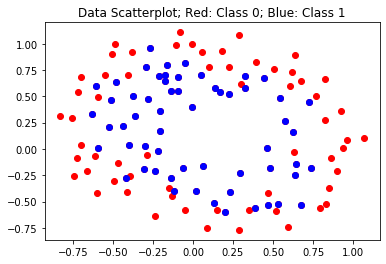

In [18]:
df = pandas.read_csv("../week01/ex2data2.txt", names=['x','y','label'], index_col=False)

feature_cols = ['x','y']

train_X = df[feature_cols].values
train_labels = df['label'].values

# plot it!
plt.plot(train_X[:, 0], train_X[:, 1], 'ro')
plt.plot(train_X[np.where(train_labels==1), 0][0], 
         train_X[np.where(train_labels==1), 1][0], 'bo')
plt.title("Data Scatterplot; Red: Class 0; Blue: Class 1")



Text(0.5, 1.0, 'Data Scatterplot; Red: Class 0; Blue: Class 1')

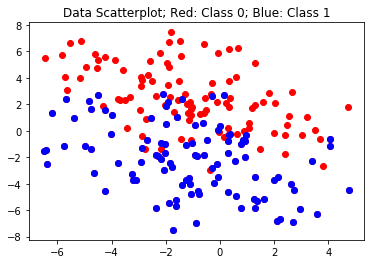

In [3]:
np.random.seed(0) # so things are 'random'

# a function to generate some simulated data
def make_data(n_per_class):
    # initializing data arrays
    group = np.empty((0, 2))
    group_labels = np.empty((0, 0))
    
    # a function to define the decision boundary between x and y
    boundary_function = lambda x: (x**3.0 + 3.0 * x**2.0 - 6.0 * x- 8.0) / 4.0
    
    for i in range(2):
        # x values
        x_value = np.random.uniform(-4, 2, size=n_per_class[i])
        
        
        # here's how the decision boundary works: we add noise so the y value point lies above or
        # below the decision boundary
        if i ==0:
            y_noise = np.random.uniform(-0.5, 5.0, size=n_per_class[i])
        else:
            y_noise = np.random.uniform(-5.0, 0.5, size=n_per_class[i])
            
        # make the x and y values
        y_value = boundary_function(x_value) + y_noise
        
        x_noise = np.random.uniform(-3, 3, size=n_per_class[i])
        x_value = x_value + x_noise
        
        # assemble the data
        tmp_group_data = np.append(x_value, y_value)
        tmp_group_data = tmp_group_data.reshape(n_per_class[i], 2, order='F')
    
        # assemble the labels
        tmp_group_labels = np.repeat([i], n_per_class[i])
    
        group = np.vstack((group, tmp_group_data))
        group_labels = np.append(group_labels, tmp_group_labels)
    
    # return a dict of data and labels
    return({'group': group, 'group_labels': group_labels})


# make data; get out the data and labels
training_data = make_data([100, 100])
train_X = training_data['group']
train_labels = training_data['group_labels']

# plot it!
plt.plot(train_X[:, 0], train_X[:, 1], 'ro')
plt.plot(train_X[np.where(train_labels==1), 0][0], 
         train_X[np.where(train_labels==1), 1][0], 'bo')
plt.title("Data Scatterplot; Red: Class 0; Blue: Class 1")



In [10]:

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_decision_boundary(X, labels, h=.02):

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.plot(X[:, 0], X[:, 1], 'ro')
    plt.plot(X[np.where(labels==1), 0][0], 
         X[np.where(labels==1), 1][0], 'bo')

    return plt

## "training" model

In [19]:
train_X


array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [20]:
train_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
train_labels.shape


(118,)

In [24]:
k = 3


model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_X, train_labels)
train_predicted_labels = model.predict(train_X)

print("number misclassified ... ", sum(train_labels != train_predicted_labels))

    


number misclassified ...  16


In [25]:
train_predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1])

Text(0.5, 1.0, 'k=3')

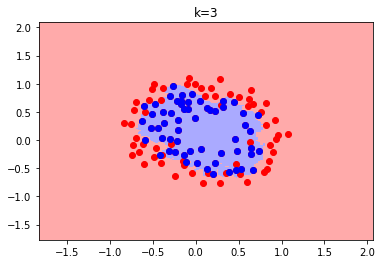

In [26]:

p = plot_decision_boundary(train_X, train_labels)
p.title("k=%d" % k)


number misclassified ...  0


Text(0.5, 1.0, 'k=1')

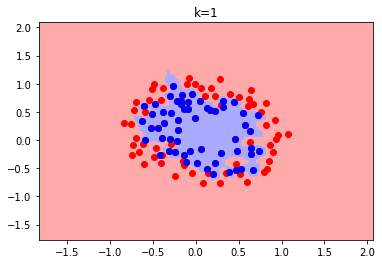

In [28]:
# all together now

k = 1

model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_X, train_labels)
train_predicted_labels = model.predict(train_X)

print("number misclassified ... ", sum(train_labels != train_predicted_labels))

p = plot_decision_boundary(train_X, train_labels)
p.title("k=%d" % k)


## use different test data than the training set

number of incorrect predictions: 29


Text(0.5, 1.0, 'k=3')

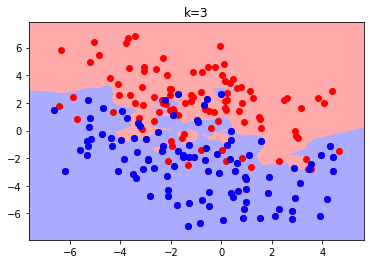

In [22]:
# fit KNN to the train data, and predict on the test data and see what it gets wrong?

np.random.seed(7) # so things are 'random'

test_data = make_data([100, 100])
test_X = test_data['group']
test_true_labels = test_data['group_labels']

# try out some different k here
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_X, train_labels)
test_predicted_labels = model.predict(test_X)

wrong_prediction = (test_predicted_labels != test_true_labels)
print ('number of incorrect predictions:', np.sum(wrong_prediction) )


p = plot_decision_boundary(test_X, test_true_labels)
p.title("k=%d" % k)
    



k=1: number misclassified ...  41
k=3: number misclassified ...  29
k=5: number misclassified ...  33
k=7: number misclassified ...  35
k=9: number misclassified ...  35
k=11: number misclassified ...  35
k=13: number misclassified ...  35
k=15: number misclassified ...  33


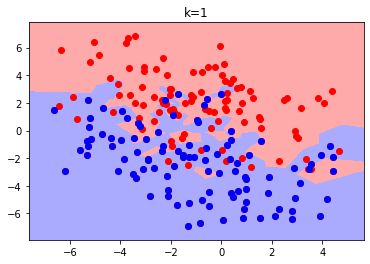

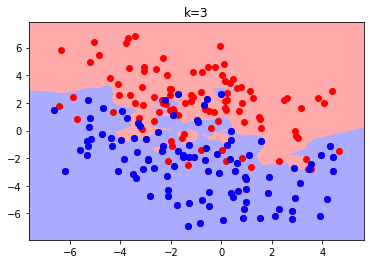

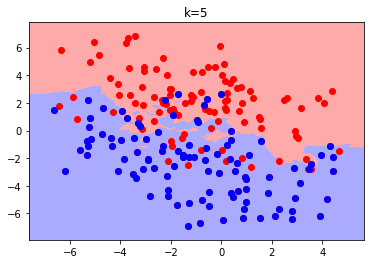

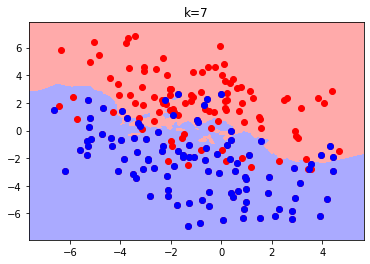

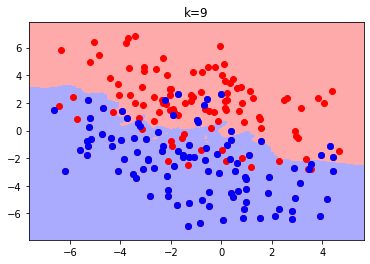

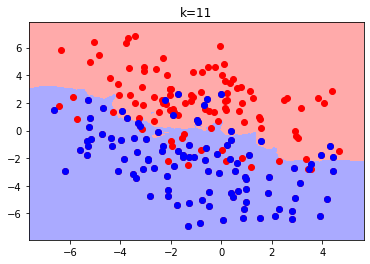

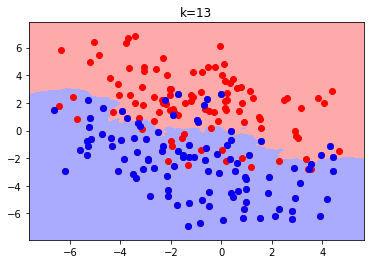

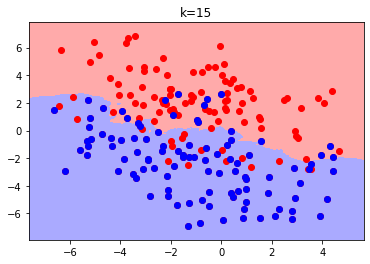

In [23]:
# loop over a bunch of k values

for k in [1,3,5,7,9,11,13,15]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(train_X, train_labels)
    test_predicted_labels = model.predict(test_X)

    print("k=%d: number misclassified ... "  % k ,sum(test_true_labels != test_predicted_labels))

    p = plot_decision_boundary(test_X, test_true_labels)
    p.title("k=%d" % k)
 

## experiment w/ distance metric


In [20]:
dist = DistanceMetric.get_metric('manhattan')

X = [[0, 0],
     [3, 4]]

dist.pairwise(X)



array([[0., 7.],
       [7., 0.]])

In [21]:
dist = DistanceMetric.get_metric('euclidean')

X = [[0, 0],
     [3, 4]]

dist.pairwise(X)



array([[0., 5.],
       [5., 0.]])

In [23]:
k = 5

#metric = 'euclidean'
metric = 'manhattan'

model = KNeighborsClassifier(n_neighbors=k, metric=metric)
model.fit(train_X, train_labels)
train_predicted_labels = model.predict(train_X)

print("number misclassified ... ", sum(train_labels != train_predicted_labels))

    


number misclassified ...  30


k=1: number misclassified ...  44
k=3: number misclassified ...  32
k=5: number misclassified ...  35
k=7: number misclassified ...  35
k=9: number misclassified ...  34
k=11: number misclassified ...  37
k=13: number misclassified ...  36
k=15: number misclassified ...  36


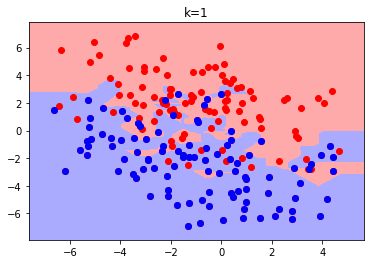

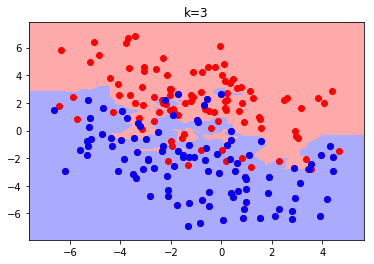

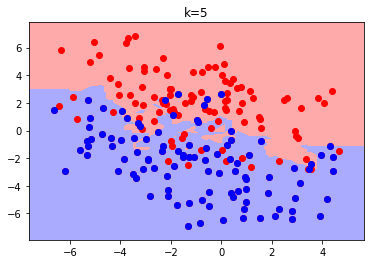

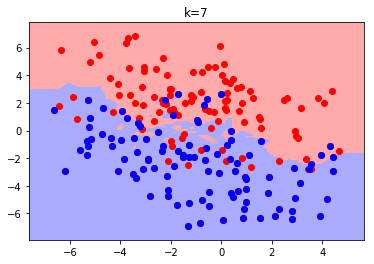

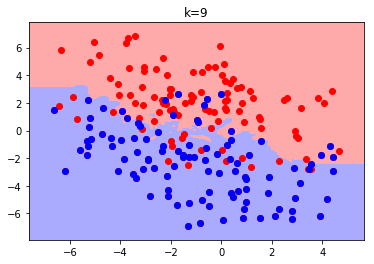

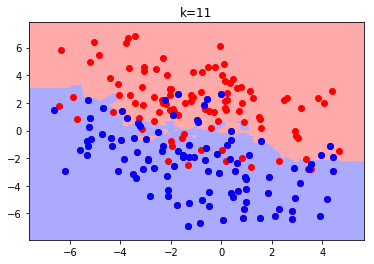

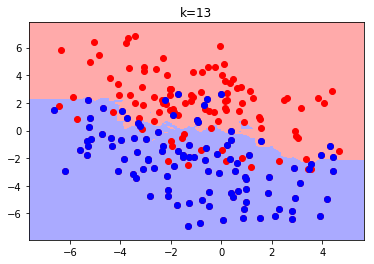

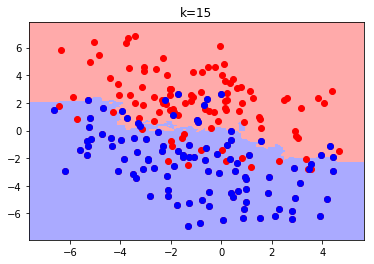

In [24]:
# loop over a bunch of k values

metric = 'manhattan'
for k in [1,3,5,7,9,11,13,15]:
    model = KNeighborsClassifier(n_neighbors=k, metric=metric)
    model.fit(train_X, train_labels)
    test_predicted_labels = model.predict(test_X)

    print("k=%d: number misclassified ... "  % k ,sum(test_true_labels != test_predicted_labels))

    p = plot_decision_boundary(test_X, test_true_labels)
    p.title("k=%d" % k)
 